In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization
print("Loaded all the libraries")

Loaded all the libraries


Using TensorFlow backend.


In [2]:
fpath = "images/Images/"                                                              # Path of images
categories = os.listdir(fpath)
categories = categories[:20]                                                          # Classes present
print("List of categories =",categories,"\n\nNo. of categories =",len(categories))

List of categories = ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound'] 

No. of categories = 20


In [3]:
cate = categories[0:5]                                                              # Some classs names
for idx, cont in enumerate(cate):
    print(idx,":",cont)

0 : n02085620-Chihuahua
1 : n02085782-Japanese_spaniel
2 : n02085936-Maltese_dog
3 : n02086079-Pekinese
4 : n02086240-Shih-Tzu


In [4]:
def load_images_and_labels(categories):                                             # Loading images and their labels
    img_lst = []
    labels = []
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+'/'+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)                     # Read images
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
            img_array = Image.fromarray(img,'RGB')
            resized_img = img_array.resize((227,227))
            img_lst.append(np.array(resized_img))
            labels.append(index)
    return img_lst,labels

images, labels = load_images_and_labels(categories)

In [5]:
print("No. of images loaded =",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded = 3633 
No. of labels loaded =  3633
<class 'list'> <class 'list'>


In [6]:
images = np.array(images)
labels = np.array(labels)
print("Images shape =",images.shape,"\nLabels shape =",labels.shape)
print(type(images),type(labels))

Images shape = (3633, 227, 227, 3) 
Labels shape = (3633,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


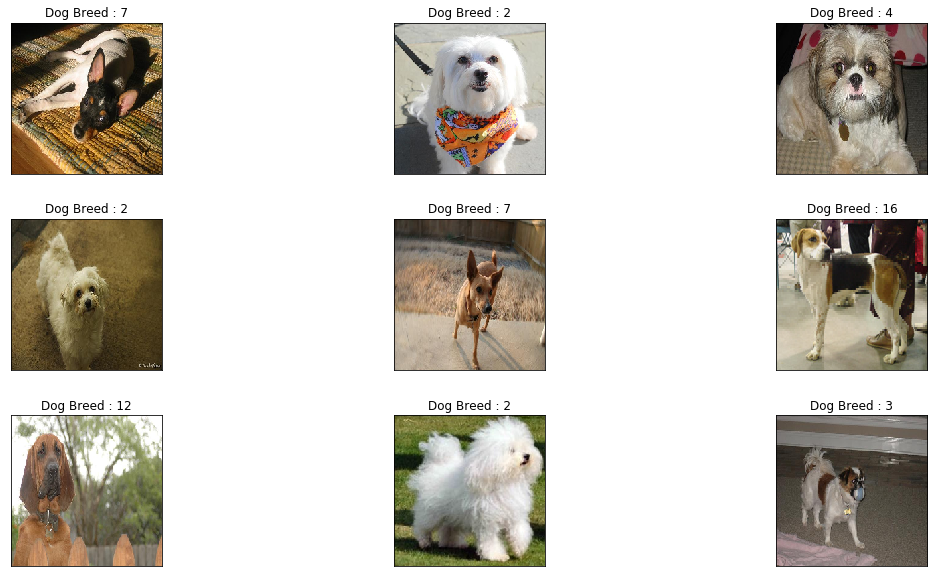

In [7]:
def display_rand_images(images,labels):                                   # Visualize some images and thier labels
    plt.figure(1,figsize = (19,10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0,images.shape[0],1)
        #print(r)
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title("Dog Breed : {}".format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
display_rand_images(images,labels)

(227, 227, 3)
(3633, 227, 227, 3)
(3633,)


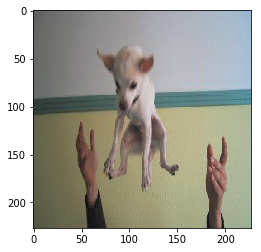

In [8]:
print(images[2][:].shape)
print(images.shape)
print(labels.shape)
plt.imshow(images[2][:])

In [9]:
n = np.arange(images.shape[0])
print("'n' values before shuffling =",n)
np.random.seed(random_seed)
np.random.shuffle(n)                                                           # Randomly shuffling images before training
print("'n' values after shuffling =",n)

'n' values before shuffling = [   0    1    2 ... 3630 3631 3632]
'n' values after shuffling = [2178  183  184 ...  860 3507 3174]


In [10]:
images = images[n]
labels = labels[n]
print("Images shape after shuffling =",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling = (3633, 227, 227, 3) 
Labels shape after shuffling =  (3633,)


In [11]:
images = images.astype(np.float32)                                            # Data normalization
labels = labels.astype(np.float32)
images = images/255.
print("Images shape sfter normalization = ",images.shape)

Images shape sfter normalization =  (3633, 227, 227, 3)


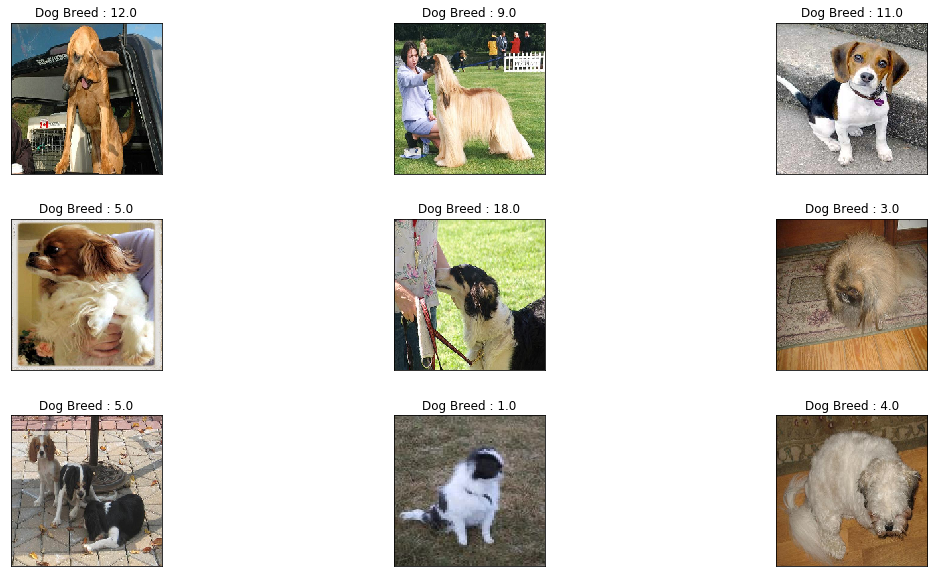

In [13]:
display_rand_images(images,labels)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed) # Splitting images
print("x_train shape =",x_train.shape)                                                                           # into training and 
print("y_train shape =",y_train.shape)                                                                           # testing data
print("x_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape = (2906, 227, 227, 3)
y_train shape = (2906,)
x_test shape =  (727, 227, 227, 3)
y_test shape =  (727,)


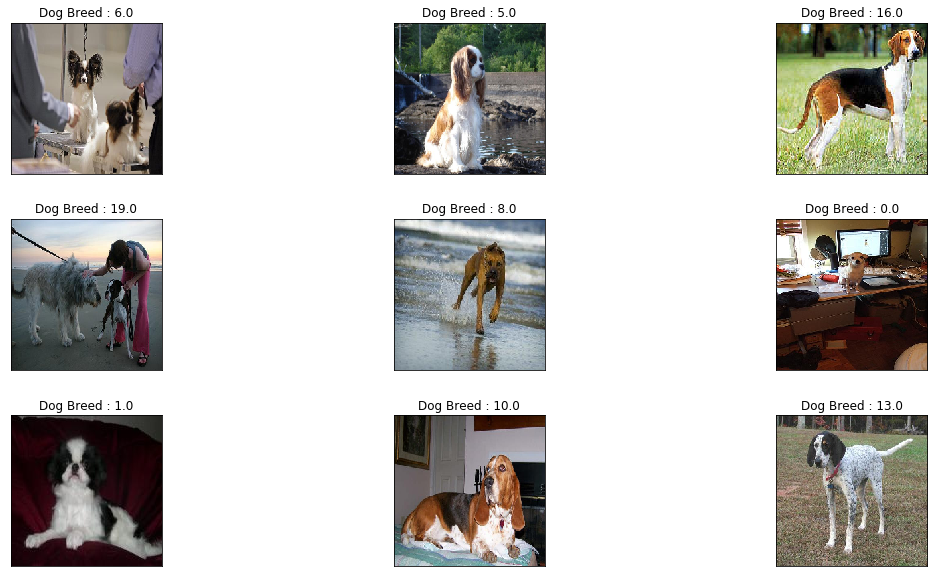

In [15]:
display_rand_images(x_train,y_train)

In [16]:
#Model architecture

model = Sequential()            #Input Layer

# Layer 1
model.add(Conv2D(filters = 96, kernel_size = (11,11),strides = (4,4),padding = "valid",activation = 'relu'
                 ,input_shape = (227,227,3)))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(filters = 256,kernel_size = (5,5),strides = (1,1),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2)))
model.add(BatchNormalization())

# 3rd conv layer
model.add(Conv2D(filters = 384, kernel_size = (3,3),strides = (1,1),padding = 'valid', activation = 'relu'))

# 4th conv layer
model.add(Conv2D(filters = 384, kernel_size = (3,3),strides = (1,1),padding = 'valid', activation = 'relu'))

# 5th conv layer
model.add(Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(4096,input_shape = (227,227,3),activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(4096,activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1000,activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(20,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)        

In [17]:
model.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics =['accuracy'])

In [18]:
model.fit(x_train,y_train,epochs = 100,verbose = 1)                             # Train the model

Wall time: 0 ns
Epoch 1/100
2906/2906 [==============================] - 17s 6ms/step - loss: 3.5322 - accuracy: 0.0957
Epoch 2/100
2906/2906 [==============================] - 11s 4ms/step - loss: 3.2262 - accuracy: 0.1208
Epoch 3/100
2906/2906 [==============================] - 11s 4ms/step - loss: 3.1168 - accuracy: 0.1304
Epoch 4/100
2906/2906 [==============================] - 11s 4ms/step - loss: 3.0114 - accuracy: 0.1469
Epoch 5/100
2906/2906 [==============================] - 12s 4ms/step - loss: 2.8872 - accuracy: 0.1610
Epoch 6/100
2906/2906 [==============================] - 11s 4ms/step - loss: 2.8034 - accuracy: 0.1738
Epoch 7/100
2906/2906 [==============================] - 11s 4ms/step - loss: 2.6962 - accuracy: 0.1944
Epoch 8/100
2906/2906 [==============================] - 11s 4ms/step - loss: 2.6518 - accuracy: 0.2030
Epoch 9/100
2906/2906 [==============================] - 11s 4ms/step - loss: 2.5596 - accuracy: 0.2271
Epoch 10/100
2906/2906 [========================

Epoch 79/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.0921 - accuracy: 0.9714
Epoch 80/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.0734 - accuracy: 0.9783
Epoch 81/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.0639 - accuracy: 0.9752
Epoch 82/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.0776 - accuracy: 0.9742
Epoch 83/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.1140 - accuracy: 0.9646
Epoch 84/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.1068 - accuracy: 0.9673
Epoch 85/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.1021 - accuracy: 0.9701
Epoch 86/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.1011 - accuracy: 0.9683
Epoch 87/100
2906/2906 [==============================] - 11s 4ms/step - loss: 0.1432 - accuracy: 0.9560
Epoch 88/100
2906/2906 [==============================]

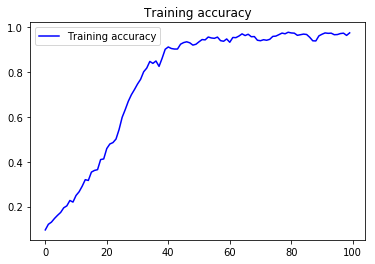

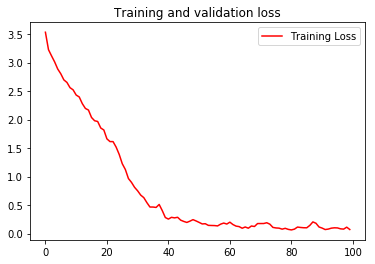

In [40]:
# Plotting the results of training

acc = model.history.history['accuracy']
loss = model.history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

727/727 [==============================] - 1s 1ms/step
5.183164639190926 0.30123797059059143


In [20]:
pred = model.predict(x_test)
pred.shape

(727, 20)

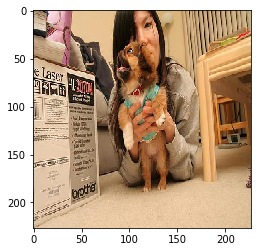

3.0


In [21]:
plt.imshow(x_test[0,:])
plt.show()
print(y_test[0])

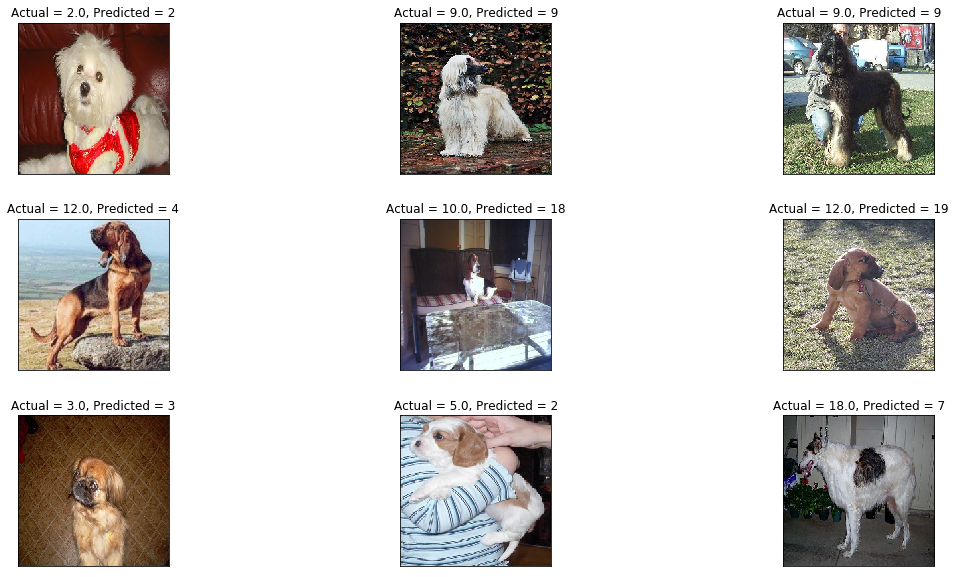

In [39]:
plt.figure(1,figsize = (19,10))
n = 0
for i in range(9):
    n+=1
    r = np.random.randint(0,x_test.shape[0],1)
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    plt.imshow(x_test[r[0]])
    #plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]])) 
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , np.argmax(pred[r[0]])))
    plt.xticks([]) 
    plt.yticks([])
plt.show()